In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import requests
%matplotlib inline

# `Gather`

## Download `image predicitons` programmatically 

In [3]:
# # Download and save tweet image predicitons as image_predictions.tsv

# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# with open('our_data/image_predictions.tsv', 'w') as f:
#     f.write(r.text)

In [138]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# # consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

## Download `tweet-json.txt` programmatically 

In [4]:


#r = requests.get('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
#with open('our_data/tweet-json.txt', 'w') as f:
#    f.write(r.text)


In [5]:
twitter_archive = pd.read_csv('our_data/twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('our_data/image-predictions.tsv', sep='\t')


In [ ]:
# Download and save tweepy data without using API

# r = requests.get('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
# with open('tweet-json.txt', 'w') as f:
#     f.write(r.text)

In [6]:
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [7]:
with open('our_data/tweet-json.txt', 'r') as f:
    tweets = "[" + ','.join(f.readlines()) + "]"

tweet_json = pd.read_json(tweets)

In [8]:
tweet_json.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# `Assess`


## `Twitter Archive Assessment`

In [9]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
twitter_archive[twitter_archive['rating_numerator']==420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [12]:
# Source should be extracted from html

twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## `Image Predictions Assessment`

In [14]:
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## `Tweet JSON Assessment`

In [16]:
tweet_json


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [17]:
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [18]:
tweet_json.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Twitter Archive
 #### Tidiness
 Values doggo, floofer pupper and puppo they are 4 variables, they should be a single variable - dogtype <br />
 #### Clean
 All IDs object
 Time stamp to date time <br/>
 Dogtypey should be category <br/>
 Extract source from html <br/>
 Numerator and denominator converted to a ratio as a means to normalize the data <br/>
 Name should should fix a, and the names <br/>
 Name should have none converted to np.nan <br/>
 Dogtype extracting more than one value <br/>

## Image Prediction
 #### Tidiness
 There are three observations - p1, p2, p3 should be restructured into pass [1, 2, 3] then prediction and select the highest     confidence label (group by on ID where conf max)<br />
 #### Clean
 All IDs - string / object
 Select highest confidence pass and drop confidence, and classification_pass columns<br/>

## Tweet JSON
 
 #### Clean
 All IDs - string / object
 display_text_range - should be single character count - character_count<br/>

## clean

In [19]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Twitter Archive Tidiness 




### Define
#### Extract Replies and Retweets Tables

### code

In [20]:
#Extract Replies and Retweets Tables
retweet_cols = ['tweet_id', 'source', 'retweeted_status_id', 
                'retweeted_status_user_id', 'retweeted_status_timestamp']
reply_cols= ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
             'timestamp', 'source', 'text', 'rating_numerator',
             'rating_denominator']
archive_cols = ['tweet_id', 'timestamp', 'source', 'text', 
                'expanded_urls', 'rating_numerator','rating_denominator', 
                'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [21]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame
retweet_twitter_archive=select_columns(twitter_archive_clean,retweet_cols)
retweet_twitter_archive = retweet_twitter_archive.dropna().reset_index(drop=True)

### Test

In [22]:
retweet_twitter_archive.tail(5)

,tweet_id,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
176,746521445350707200,"<a href=""http://twitter.com/download/iphone"" r...",6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000
177,743835915802583040,"<a href=""http://twitter.com/download/iphone"" r...",6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000
178,711998809858043904,"<a href=""http://twitter.com/download/iphone"" r...",7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000
179,667550904950915073,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000
180,667550882905632768,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000


In [23]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [143]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2339 non-null object
timestamp             2339 non-null datetime64[ns, UTC]
source                2339 non-null object
text                  2339 non-null object
expanded_urls         2282 non-null object
rating_numerator      2339 non-null float32
rating_denominator    2339 non-null int32
name                  1526 non-null object
dogtype               366 non-null category
rating_ratio          2339 non-null float64
dtypes: category(1), datetime64[ns, UTC](1), float32(1), float64(1), int32(1), object(5)
memory usage: 246.9+ KB


In [24]:
replies_twitter_archive=select_columns(twitter_archive_clean,reply_cols)
replies_twitter_archive = replies_twitter_archive.dropna().reset_index(drop=True)

In [25]:
replies_twitter_archive.tweet_id.count

<bound method Series.count of 0     886267009285017600
1     881633300179243008
2     879674319642796034
3     870726314365509632
4     863427515083354112
             ...        
73    671550332464455680
74    669684865554620416
75    669353438988365824
76    668967877119254528
77    667070482143944705
Name: tweet_id, Length: 78, dtype: int64>

In [26]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Define
####   drop replies and retweets columns 

### code

In [27]:
#drop replies and retweets columns 
twitter_archive_clean=select_columns(twitter_archive_clean,archive_cols)

### Test

In [28]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [29]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Define
####  Convert values doggo, floofer, pupper, and puppo into single categorical variable

### code

In [30]:
# Convert values doggo, floofer, pupper, and puppo into single categorical variable
dogtype_cols = ['doggo', 'floofer', 'pupper', 'puppo']

dogtype = twitter_archive_clean[dogtype_cols].replace('None', '')

twitter_archive_clean['dogtype'] = dogtype.apply(lambda x: ''.join(x), axis=1).replace('^$', np.nan, regex=True)

twitter_archive_clean.drop(dogtype_cols, axis=1, inplace=True)

### test

In [31]:
twitter_archive_clean.dogtype.sample(20)

911     pupper
1575    pupper
452        NaN
1903    pupper
1452       NaN
1033       NaN
724      doggo
1232       NaN
878        NaN
210        NaN
1064       NaN
300      doggo
1818    pupper
181        NaN
2251       NaN
2149       NaN
6          NaN
1754       NaN
2265       NaN
399        NaN
Name: dogtype, dtype: object

In [32]:
# Test dogtype column
twitter_archive_clean.dogtype.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dogtype, dtype: int64

In [33]:
#looking at the data there are multiple types 
multiple_types = ['doggopupper', 'doggopuppo', 'doggofloofer']
    
twitter_archive_clean = twitter_archive_clean.query('dogtype not in @multiple_types')

In [34]:
#testing
twitter_archive_clean.dogtype.value_counts()

pupper     245
doggo       83
puppo       29
floofer      9
Name: dogtype, dtype: int64

## Twitter Archive Cleanliness

### define
#### Fixing data types

### code

In [140]:
# Fixing data types
# timestamp to datetime object, IDs to objects, dogtionary to category
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
retweet_twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(retweet_twitter_archive.retweeted_status_timestamp)
twitter_archive_clean['dogtype'] = twitter_archive_clean.dogtype.astype('category')

#change IDs to Object
twitter_archive_clean['tweet_id'] = twitter_archive_clean.tweet_id.astype('object')
replies_twitter_archive['in_reply_to_status_id'] = replies_twitter_archive.in_reply_to_status_id.astype('object')
replies_twitter_archive['in_reply_to_user_id'] = replies_twitter_archive.in_reply_to_user_id.astype('object')
retweet_twitter_archive['retweeted_status_id'] = retweet_twitter_archive.retweeted_status_id.astype('object')
retweet_twitter_archive['retweeted_status_user_id'] = retweet_twitter_archive.retweeted_status_user_id.astype('object')

### test

In [36]:
#check type of columns
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2342 non-null int64
timestamp             2342 non-null datetime64[ns, UTC]
source                2342 non-null object
text                  2342 non-null object
expanded_urls         2283 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  2342 non-null object
dogtype               366 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 167.1+ KB


### define

#### Source stored as `HTML`

In [37]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2208
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
# replace source contents by using below dictionary

sources = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
          }
for df in [twitter_archive_clean, replies_twitter_archive, retweet_twitter_archive]:
    df['source'] = df.source.replace(sources)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### test

In [39]:
# testing the change in source 
twitter_archive_clean.source.value_counts()

Twitter iPhone    2208
Vine                90
Twitter Web         33
TweetDeck           11
Name: source, dtype: int64

In [40]:
twitter_archive_clean.query('rating_denominator == 11').text.reset_index(drop=True).to_list()[0]

'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'

In [41]:
twitter_archive_clean['test'] = twitter_archive_clean.text.str.extract('(\d+(?:\.\d+)?/\d+(?:\.\d+)?0)', expand=True)[0]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
twitter_archive_clean['test'].sample(5)

795     12/10
1568    12/10
1271     8/10
59      12/10
1454    12/10
Name: test, dtype: object

In [43]:
twitter_archive_clean.dropna(subset=['test'], inplace=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
# assign new ratings to the numerator and denominator column 

twitter_archive_clean['rating_numerator'] = twitter_archive_clean.test.str.split('/').str[0].astype('float32')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean.test.str.split('/').str[1].astype('int32')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [45]:
# drop test column

twitter_archive_clean.drop('test', axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### define
####  Create ratio rating column

### code

In [46]:
#will assign a column to ratio by dividing numerator by denominator
twitter_archive_clean['rating_ratio'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### test

In [47]:
twitter_archive_clean.rating_denominator.value_counts()

10     2323
50        3
80        2
20        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
0         1
Name: rating_denominator, dtype: int64

### define
#### Improve extracting names from tweets and set None to np.nan

### code

In [48]:
# View most common names

twitter_archive_clean.name.value_counts()[:5]

None       735
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [67]:
fixed_names = twitter_archive_clean.query('name in ["a", "None", "the", "an"]').text.str\
.extract('named ([A-Z]{1}[a-z]+)|this is ([A-Z]{1}[a-z]+|name is ([A-Z]{1}[a-z]+))', 
         expand=True)

### test

In [76]:
fixed_names.sample(9)
fixed_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 5 to 2355
Data columns (total 1 columns):
summed    29 non-null object
dtypes: object(1)
memory usage: 52.6+ KB


In [73]:
fixed_names['summed'] = fixed_names.fillna('').sum(axis=1).replace('', np.nan)
fixed_names.drop([0,1,2], axis=1, inplace=True)

fixed_names

,summed
5,NaN
7,NaN
12,NaN
24,NaN
25,NaN
...,...
2351,NaN
2352,NaN
2353,NaN
2354,NaN


In [74]:
# clean known non names so that I can add the recently extracted to the names col

twitter_archive_clean.name.replace(["a", "None", "the", "an"], np.nan, inplace=True)
twitter_archive_clean = twitter_archive_clean.join(fixed_names)

D:\anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtype,rating_ratio,summed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,1.3,NaN


In [77]:

# Make sure all other non name words are removed

col = twitter_archive_clean[['name', 'summed']].fillna('').sum(axis=1)

lower_func = lambda x: '' if x.islower() else x
twitter_archive_clean['name'] = col.apply(lower_func).replace('', np.nan)

twitter_archive_clean.drop(['summed'], axis=1, inplace=True)

In [78]:
# Set name column to capitalize the first letter.

twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

In [79]:
twitter_archive_clean.name.sample(5)


1259        NaN
1217        NaN
700      Mattie
1593    Crimson
2251      Filup
Name: name, dtype: object

# `save`

In [80]:
# save clean dataset to csv

twitter_archive_clean.to_csv('twitter_archive_clean.csv', index=False)

# Image Predictions Cleaning


### define
#### set ID to object

### code

In [141]:
# set ID to object

image_prediction_melt['tweet_id'] = image_prediction_melt.tweet_id.astype('object')

### test

In [88]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### define 
#### convert the pass values into a single variable

### code

In [83]:
# convert the pass values into a single variable
#Using the melt method, I will reshape the data frame to [pass, confidence, breed, dog]
image_prediction_melt = pd.melt(image_predictions_clean, id_vars=['tweet_id', 'jpg_url', 'img_num'],
                                  var_name='classification_pass',
                                  value_vars=['p1', 'p2', 'p3'],
                                  value_name='breed')

image_prediction_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 5 columns):
tweet_id               6225 non-null int64
jpg_url                6225 non-null object
img_num                6225 non-null int64
classification_pass    6225 non-null object
breed                  6225 non-null object
dtypes: int64(2), object(3)
memory usage: 243.3+ KB


### test

In [90]:
image_prediction_melt.head(2)

,tweet_id,jpg_url,img_num,classification_pass,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone


### define
#### Get the confidence and dog breed columns

#### code

In [98]:
# Get the confidence and dog breed columns

confidence = pd.melt(image_predictions_clean, id_vars=['tweet_id', 'jpg_url', 'img_num'], 
               var_name='vars', 
               value_vars=['p1_conf', 'p2_conf', 'p3_conf'],
               value_name='confidence').confidence.values

In [99]:
confidence

array([0.465074 , 0.506826 , 0.596461 , ..., 0.0313789, 0.0689569,
       0.07611  ])

In [100]:
dog = pd.melt(image_predictions_clean, id_vars=['tweet_id', 'jpg_url', 'img_num'], 
               var_name='vars', 
               value_vars=['p1_dog', 'p2_dog', 'p3_dog'],
               value_name='dog').dog.values

In [101]:
dog

array([ True,  True,  True, ...,  True,  True, False])

In [102]:

image_prediction_melt['confidence'] = confidence

image_prediction_melt['dog'] = dog

### test

In [104]:
image_prediction_melt.head(2)

,tweet_id,jpg_url,img_num,classification_pass,confidence,breed,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,0.465074,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,0.506826,redbone,True


In [106]:
# testing sample
image_prediction_melt = image_prediction_melt[['tweet_id', 'jpg_url', 'img_num', 'classification_pass', 
                                               'confidence', 'breed', 'dog']]
image_prediction_melt.sample(5)

,tweet_id,jpg_url,img_num,classification_pass,confidence,breed,dog
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,p1,0.664834,Chihuahua,True
4943,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,p3,0.002795,kuvasz,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,p1,0.194610,Scottish_deerhound,True
5765,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,p3,0.053365,kelpie,True
3175,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,p2,0.174497,groenendael,True


In [134]:
# filter by p1 as it appears that p1 has the highest confidence for all occurances.
image_prediction_melt = image_prediction_melt.query('classification_pass == "p1"')


In [108]:
image_prediction_melt

,tweet_id,jpg_url,img_num,classification_pass,confidence,breed,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,0.465074,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,0.506826,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,0.596461,German_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,0.408143,Rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,0.560311,miniature_pinscher,True
...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p1,0.555712,basset,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p1,0.170278,paper_towel,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p1,0.716012,Chihuahua,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p1,0.323581,Chihuahua,True


### define
#### set breed to lower case and select the final columns to save

### code

In [109]:
# set breed to lower case and select the final columns to save
cols = ['tweet_id', 'jpg_url','img_num', 'breed', 'dog']
image_prediction_melt['breed'] = image_prediction_melt.breed.str.lower()
image_prediction_clean = image_prediction_melt[cols]

### test

In [144]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       2075 non-null object
dog         2075 non-null bool
dtypes: bool(1), int64(2), object(2)
memory usage: 83.1+ KB


# `save`

In [111]:

# save final image prediction dataset to csv file

image_prediction_clean.to_csv('image_prediction_clean.csv', index=False)

## Tweet Json Tidiness


In [112]:
tweet_json_clean.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [113]:
# Select desired columns

cols = ['id', 'created_at', 'display_text_range', 'favorite_count', 'retweet_count']

tweet_json_clean = tweet_json_clean.query('lang == "en"')[cols]


## Tweet Json Cleaning


### define
#### fix data type

### code

In [142]:
#fix data type
tweet_json_clean['id']= tweet_json_clean.id.astype('object')


### test

In [147]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 5 columns):
id                 2336 non-null object
created_at         2336 non-null datetime64[ns, UTC]
favorite_count     2336 non-null int64
retweet_count      2336 non-null int64
character_count    2336 non-null int64
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 109.5+ KB


### define
#### using the second index from range as the length

### code


In [114]:
# using the second index from range as the length

tweet_json_clean['character_count'] = tweet_json_clean.display_text_range.str[1]
tweet_json_clean.drop('display_text_range', axis=1, inplace=True)

### test

In [145]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 5 columns):
id                 2336 non-null object
created_at         2336 non-null datetime64[ns, UTC]
favorite_count     2336 non-null int64
retweet_count      2336 non-null int64
character_count    2336 non-null int64
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 109.5+ KB


# `save`

In [116]:
tweet_json_clean.to_csv('tweet_json_clean.csv', index=False)


## make the final table


In [119]:
df = pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id')
complete_df = pd.merge(df, tweet_json_clean, left_on='tweet_id', right_on='id')
cols = ['tweet_id', 'created_at', 'source', 'text', 'character_count', 'name', 
        'dog', 'breed', 'dogtype', 'rating_ratio', 'favorite_count', 'retweet_count', 
        'expanded_urls', 'jpg_url']
complete_df[cols].to_csv('analysis_data_set.csv', index=False)

# `Analyze`

In [120]:
analysis_data_set=complete_df[cols].copy()

In [121]:
analysis_data_set.head(2)

,tweet_id,created_at,source,text,character_count,name,dog,breed,dogtype,rating_ratio,favorite_count,retweet_count,expanded_urls,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter iPhone,This is Phineas. He's a mystical boy. Only eve...,85,Phineas,False,orange,NaN,1.3,39467,8853,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter iPhone,This is Tilly. She's just checking pup on you....,138,Tilly,True,chihuahua,NaN,1.3,33819,6514,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg


In [122]:
analysis_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 14 columns):
tweet_id           2051 non-null int64
created_at         2051 non-null datetime64[ns, UTC]
source             2051 non-null object
text               2051 non-null object
character_count    2051 non-null int64
name               1418 non-null object
dog                2051 non-null bool
breed              2051 non-null object
dogtype            307 non-null category
rating_ratio       2051 non-null float64
favorite_count     2051 non-null int64
retweet_count      2051 non-null int64
expanded_urls      2051 non-null object
jpg_url            2051 non-null object
dtypes: bool(1), category(1), datetime64[ns, UTC](1), float64(1), int64(4), object(6)
memory usage: 212.5+ KB


In [123]:
analysis_data_set.describe()

,tweet_id,character_count,rating_ratio,favorite_count,retweet_count
count,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.381795e+17,111.719649,1.165908,8527.893710,2950.543637
std,6.786637e+16,26.143299,4.007080,12049.556241,5000.732425
min,6.660209e+17,13.000000,0.000000,0.000000,16.000000
25%,6.764355e+17,94.000000,1.000000,1675.000000,634.500000
50%,7.113638e+17,116.000000,1.100000,3855.000000,1403.000000
75%,7.931732e+17,137.000000,1.200000,10940.000000,3443.000000
max,8.924206e+17,148.000000,177.600000,132810.000000,79515.000000


In [126]:
# breed count

breed_count = analysis_data_set.query('dog == True')\
.groupby('breed').count()[['tweet_id']]\
.sort_values('tweet_id', ascending=False)[:20]

In [127]:
breed_count

,tweet_id
breed,
golden_retriever,142
labrador_retriever,98
pembroke,88
chihuahua,83
pug,57
chow,44
samoyed,43
toy_poodle,39
pomeranian,38


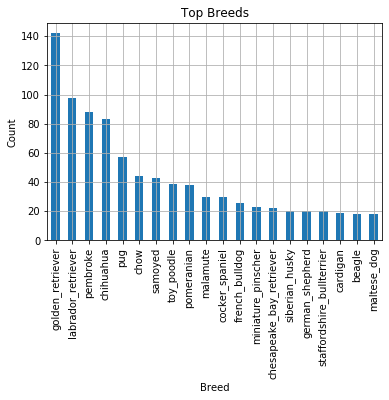

In [129]:
breed_count.plot(kind='bar', legend=False)
plt.title("Top Breeds")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.grid()
plt.savefig('top_breeds.png');


### As we can see, the top breed identified by the image classifier by a wide margin is golden retriever, followed by labrador retriever.

In [131]:
avg_likes_retweets = analysis_data_set.query('dog == True').groupby('breed').mean()[['favorite_count', 'retweet_count']]
avg_likes_retweets['count'] = analysis_data_set.query('dog == True').groupby('breed').count()[['tweet_id']]

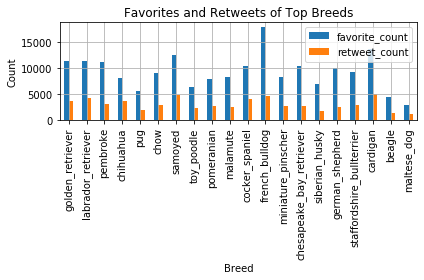

In [132]:
# favorites and retweets of top dog breeds

avg_likes_retweets.sort_values('count', ascending=False)[['favorite_count', 'retweet_count']][:20]\
.plot(kind='bar')
plt.title('Favorites and Retweets of Top Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.savefig('breed_favorites_retweets.png');